d:\Programming\Python programs\Sushil Gautam\Computer Graphics


Before clipping		After clipping
(1.0, -3.0)		(3.27, 2.0)
(6.0, 8.0)		(4.64, 5.0)


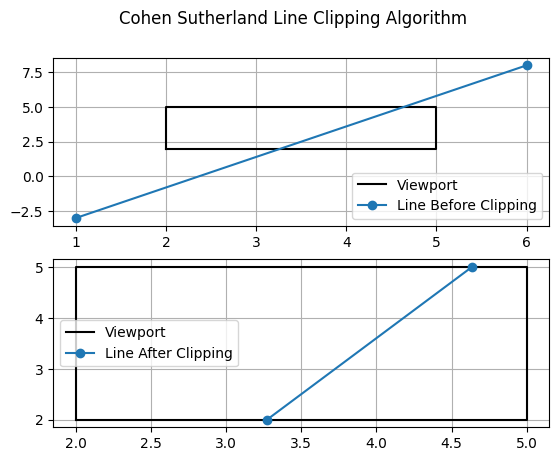

In [19]:
# Python program to implement Cohen Sutherland algorithm
import os
print(os.getcwd())
import matplotlib.pyplot as plt
from copy import deepcopy
# Defining region codes
INSIDE = 0  # 0000
LEFT = 1  # 0001
RIGHT = 2  # 0010
BOTTOM = 4  # 0100
TOP = 8  # 1000

# Defining x_max, y_max and x_min, y_min for rectangle

x_min,y_min=map(float,input("Enter x-min and y-min respectively: ").split())
x_max,y_max=map(float,input("Enter x-max and y-max respectively: ").split())


# Function to compute region code for a point(x, y)
def computeCode(x, y):
    code = INSIDE
    if x < x_min:  # to the left of rectangle
        code |= LEFT
    elif x > x_max:  # to the right of rectangle
        code |= RIGHT
    if y < y_min:  # below the rectangle
        code |= BOTTOM
    elif y > y_max:  # above the rectangle
        code |= TOP
    return code


# Implementing Cohen-Sutherland algorithm
# Clipping a line from P1 = (x1, y1) to P2 = (x2, y2)
# Implementing Cohen-Sutherland algorithm
# Clipping a line from P1 = (x1, y1) to P2 = (x2, y2)
def cohenSutherlandClip(x1, y1, x2, y2,ax1,copyx,copyy):
    
    # Compute region codes for P1, P2
    code1 = computeCode(x1, y1)
    code2 = computeCode(x2, y2)
    accept = False

    while True:

        # If both endpoints lie within rectangle
        if code1 == 0 and code2 == 0:
            accept = True
            break

        # If both endpoints are outside rectangle
        elif (code1 & code2) != 0:
            break

        # Some segment lies within the rectangle
        else:

            # Line needs clipping
            # At least one of the points is outside,
            # select it
            x = 1.0
            y = 1.0
            if code1 != 0:
                code_out = code1
            else:
                code_out = code2

            # Find intersection point
            # using formulas y = y1 + slope * (x - x1),
            # x = x1 + (1 / slope) * (y - y1)
            if code_out & TOP:
                # Point is above the clip rectangle
                x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
                y = y_max
            elif code_out & BOTTOM:
                # Point is below the clip rectangle
                x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
                y = y_min
            elif code_out & RIGHT:
                # Point is to the right of the clip rectangle
                y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
                x = x_max
            elif code_out & LEFT:
                # Point is to the left of the clip rectangle
                y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
                x = x_min

            # Now intersection point (x, y) is found
            # We replace point outside clipping rectangle
            # by intersection point
            if code_out == code1:
                x1 = x
                y1 = y
                code1 = computeCode(x1, y1)
            else:
                x2 = x
                y2 = y
                code2 = computeCode(x2, y2)

    if accept:
        x_list=[x1,x2]
        y_list=[y1,y2]
        ax1.plot(x_list,y_list,marker='o',label="Line After Clipping")
    else:
        print("Line rejected")
    print("Before clipping\t\tAfter clipping")
    for i in range(2):
        print(f"{copyx[i],copyy[i]}\t\t{round(x_list[i],2),round(y_list[i],2)}")
# Driver script

viewport=[[x_min,y_min],[x_max,y_min],[x_max,y_max],[x_min,y_max]]
x,y=zip(*viewport)
fig, [ax, ax1] = plt.subplots(2, 1)
ax.plot(x+(x[0],),y+(y[0],),color="black",label="Viewport")
ax1.plot(x+(x[0],),y+(y[0],),color="black",label="Viewport")
x1,y1=map(float,input("Enter initial point of line: ").split())
x2,y2=map(float,input("Enter final point of line: ").split())
x_list=[x1,x2]
y_list=[y1,y2]
copyx,copyy=deepcopy(x_list),deepcopy(y_list)
ax.plot(x_list,y_list,marker='o',label="Line Before Clipping")
cohenSutherlandClip(x1, y1, x2, y2, ax1,copyx,copyy)

ax1.legend()
ax.legend()
ax.grid(True)
ax1.grid(True)
plt.suptitle("Cohen Sutherland Line Clipping Algorithm")
plt.show()